# Chem 277B Spring 2024 Tutorial 1
---
# Outline 

* Visualizing univariate and multivariate functions
* Time your function
* Golden section: 1D function
* Minimization using CG/BFGS: 2D function

---


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Visualizing univariate and multivariate functions
## 1.1 Univariate 
$$f(x) = x^3 - 3x + 2$$

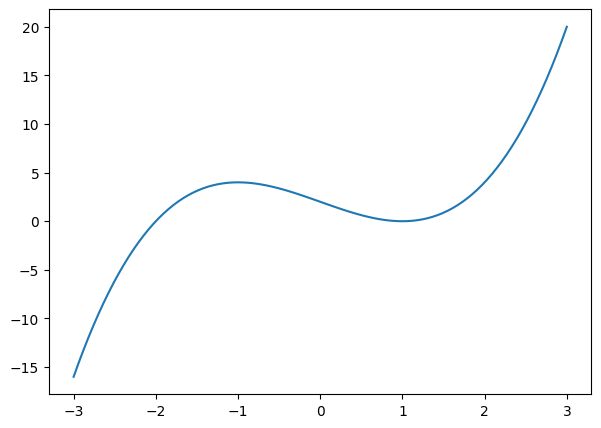

In [2]:
def func1d(x):
    f = x**3 - 3*x + 2
    return f

x = np.linspace(-3,3,100)
plt.figure(figsize = (7,5))
plt.plot(x,func1d(x))
plt.show()

## 1.2 Multivariate

In [3]:
def func2d(X):
    '''
    A 2D function
    '''
    x,y = X
    return x**4-x**2+y**2-2*x*y-2

# Create a meshgrid
x = np.linspace(-2,2,100)
y = np.linspace(-2,2,100)
X, Y = np.meshgrid(x, y)
Z = func2d([X, Y])

# Mark the minimum point on this grid (not the true minimum)
i, j  = np.unravel_index(Z.argmin(),Z.shape)
min_point = x[i], y[j], Z.min()
print(min_point)

(-0.9898989898989898, -0.9898989898989898, -2.999595990410162)


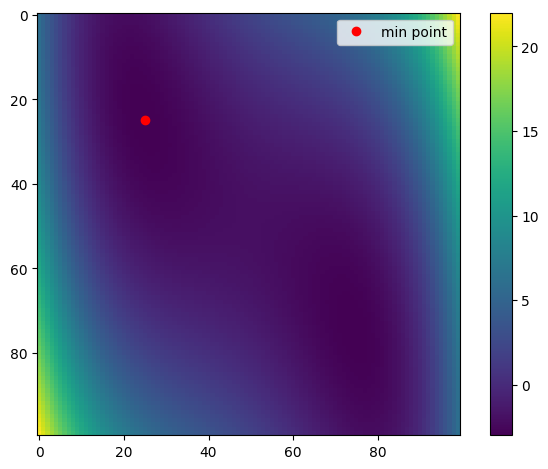

In [4]:
# Heatmap
plt.imshow(func2d([X,Y]))
plt.plot(i,j,'ro',label='min point')
plt.colorbar()
plt.legend()
plt.tight_layout()

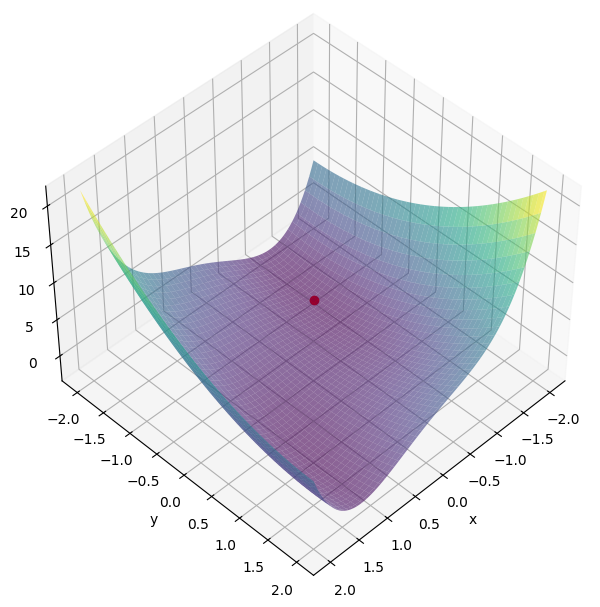

In [5]:
# Plot surface + heatmap

# Plotting
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X,Y,Z, cmap='viridis', alpha=0.6)
ax.plot(*min_point,color='r',marker='o')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.view_init(45,45) # set angles for viewing
plt.tight_layout()
plt.show()

## *TODO*: Plot the same surface but without the heat map, at a different viewing angle

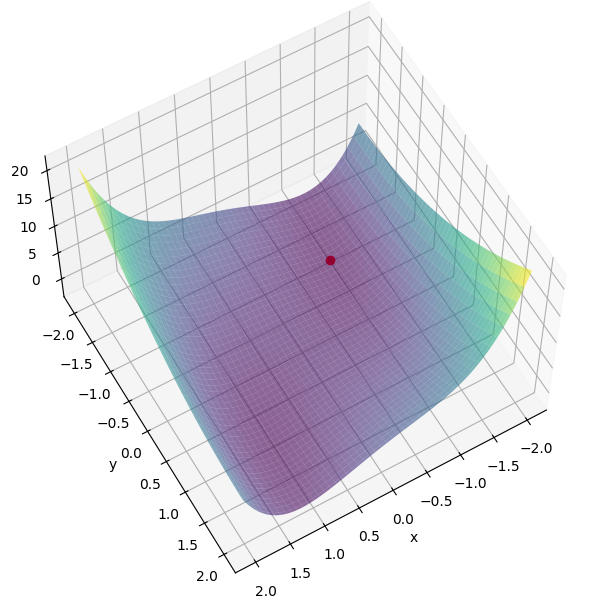

In [6]:
# Your code here
# Plotting
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X,Y,Z, cmap='viridis', alpha=0.6)
ax.plot(*min_point,color='r',marker='o')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.view_init(elev=60,azim=60) # set angles for viewing
plt.tight_layout()
plt.show()

# 2. Time your function
## 2.1 With a magic method

In [7]:
def add(a, b):
    return a + b

%timeit add(1, 2)

45.2 ns ± 0.216 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


## 2.2 With decorators

Decorators wrap a function, and modify its behavior.

In [8]:
import time

def timeit(f):

    def timed(*args, **kw):

        ts = time.time()
        result = f(*args, **kw)
        te = time.time()

        print(f'func:{f.__name__} took: {te-ts:.4f} sec')
        return result

    return timed

In [9]:
@timeit # equivalent to mysleep = timeit(mysleep)
def mysleep(sec):
    print("Sleeping...")
    time.sleep(sec)
    print("Wake up!")

mysleep(2)

Sleeping...
Wake up!
func:mysleep took: 2.0056 sec


# 3. Golden section: 1D function
Given the following function, can you find its minimum value in range $[0,9]$ using golden section?

In [10]:
def func(x):
    isarray = type(x) is np.ndarray
    coefs = np.array([
        8.0013714770, -24.06731415,  37.07604400, 0.0000000000, -43.86909846,
        44.427011010, -22.01262040,  6.536434989, -1.248082478, 0.157159012, 
        -0.012990941,  0.000678657, -2.03269E-05, 2.66065E-07
    ])
    base = np.zeros((len(x) if isarray else 1, 14))
    for i in range(1, 14):
        base[:,i] += x ** i
    result = base.dot(coefs)
    return result if isarray else np.sum(result)

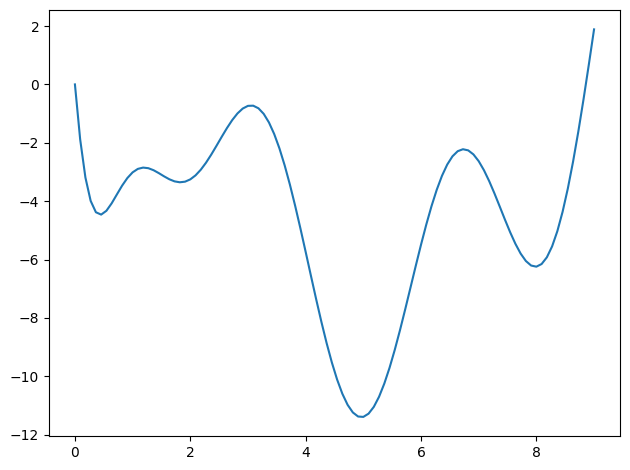

In [11]:
# Let's plot and see what this function looks like
x = np.linspace(0, 9, 100)
plt.plot(x, func(x))
plt.tight_layout()

## *TODO*: Implement golden section assuming we only need to run it once

In [12]:
# Fill out this code

# Define the golden ratio
tau = (1 + np.sqrt(5)) /2 

def golden_section_once(f, a, b):
    """
    Find the next search region in the interval [a, d] using the golden section search once.

    Params:
        f: function to optimize
        a: left limit of the region to optimize
        b: right limit of the region to optimze

    Return: next region to search
    
    """
    # define the two points to search within the region based on golden section ratio
    # HINT: the points are ordered as a-c-d-b, find points c & d
    c = b - (b - a) / tau
    d = a + (b - a) / tau

    # compare their values and identify the next search space
    # HINT: return f'next search space is from {:.3f} to {:.3f}, reduced by {(:.3f}'
    if f(c) < f(d):
        return f'next search space is from {a:.3f} to {d}, reduced by {(d-a)/(b-a):.3f}'
    else:
        return f'next search space is from {c:.3f} to {b:.3f}, reduced by {(b-c)/(b-a):.3f}'


In [13]:
print(f'1/tau = {1/tau}')
print(golden_section_once(func, 0, 9))

1/tau = 0.6180339887498948
next search space is from 3.438 to 9.000, reduced by 0.618


## *TODO*: Use recursion to feed the new search space into the same function

In [14]:
# Actually the return statement can be a function call, ie "return golden_section(f, a, d)". This is called recursion.
# However, this recursion can go on forever, and we will be stuck in an infinite loop. 
# This means that we need to define a condition for the recursion to stop!

# Let's now revisit our function
def golden_section(f, a, b, tol=1e-5, i=1):
    """
    Find the minimum of f in the interval [a, b] using the golden section search.

    Params
        f: function to optimize
        a: left limit of the region to optimize
        b: right limit of the region to optimze
        tol: tolerance for convergence
        i: # of searching rounds

    Return: the minimum point, and its functional value
    """

    c = b - (b - a) / tau
    d = a + (b - a) / tau
    
    # define the stopping condition here
    if abs(b-a) <= tol :
        return (b+a) / 2, func((b+a)/2) # return the midpoint as solution
    
    # copy the function from above and change the output to a functional call with the correct function name & variables
    if f(c) < f(d):
        print(f'next search space is from {a:.3f} to {d}, reduced by {(d-a)/(b-a):.3f}')
        return golden_section(f, a, d, tol, i+1)
    else:
        print(f'next search space is from {c:.3f} to {b:.3f}, reduced by {(b-c)/(b-a):.3f}')
        return golden_section(f, c, b, tol, i+1)

In [15]:
golden_section(func, 0, 9)

next search space is from 3.438 to 9.000, reduced by 0.618
next search space is from 3.438 to 6.875388202501893, reduced by 0.618
next search space is from 3.438 to 5.562305898749054, reduced by 0.618
next search space is from 4.249 to 5.562, reduced by 0.618
next search space is from 4.751 to 5.562, reduced by 0.618
next search space is from 4.751 to 5.252329215011357, reduced by 0.618
next search space is from 4.751 to 5.0607530887414836, reduced by 0.618
next search space is from 4.869 to 5.061, reduced by 0.618
next search space is from 4.869 to 4.987577519939434, reduced by 0.618
next search space is from 4.914 to 4.988, reduced by 0.618
next search space is from 4.942 to 4.988, reduced by 0.618
next search space is from 4.942 to 4.970303111409937, reduced by 0.618
next search space is from 4.953 to 4.970, reduced by 0.618
next search space is from 4.960 to 4.970, reduced by 0.618
next search space is from 4.960 to 4.966225176725874, reduced by 0.618
next search space is from 4.96

(4.964254940355545, -11.400276695047907)

# 4. Minimization using CG/BFGS: 2D function

In [16]:
from scipy.optimize import minimize
?minimize

Signature:
minimize(
    fun,
    x0,
    args=(),
    method=None,
    jac=None,
    hess=None,
    hessp=None,
    bounds=None,
    constraints=(),
    tol=None,
    callback=None,
    options=None,
)
Docstring:
Minimization of scalar function of one or more variables.

Parameters
----------
fun : callable
    The objective function to be minimized.

        ``fun(x, *args) -> float``

    where ``x`` is a 1-D array with shape (n,) and ``args``
    is a tuple of the fixed parameters needed to completely
    specify the function.
x0 : ndarray, shape (n,)
    Initial guess. Array of real elements of size (n,),
    where ``n`` is the number of independent variables.
args : tuple, optional
    Extra arguments passed to the objective function and its
    derivatives (`fun`, `jac` and `hess` functions).
method : str or callable, optional
    Type of solver.  Should be one of

        - 'Nelder-Mead' :ref:`(see here) <optimize.minimize-neldermead>`
        - 'Powell'      :ref:`(see here) <

In [17]:
def save_step(*args):
    for arg in args:
        if type(arg) is np.ndarray:
            steps.append(arg)

## *TODO*: Writer a wrapper function around `scipy.optimize.minimize`

In [18]:
@timeit
def minimize_function(x0, func, method):
    """
    Minimize a function
    
    Parameters
    ---------
    x0: np.ndarray
        Starting point
    func: function
        Scalar function to minimize
    method: str
        Method for minimization
    
    Returns
    ------
    res: OptimzizeResult
        Result object of scipy optimization
    """
    res = minimize(
        func,
        x0,
        method=method,
        options={"gtol": 1e-5, "disp":True},
        callback=save_step,
    )
    return res

## 4.1 Previous 2D function

$$f(x,y)=x^4-x^2+y^2-2xy-2$$


In [19]:
def func2d(X):
    '''
    A 2D function
    '''
    x,y = X
    return x**4-x**2+y**2-2*x*y-2

In [20]:
x0 = [0,-0.1]
steps = [x0] # for storing the searched points
res = minimize_function(x0, func2d, "CG")
steps1 = np.array(steps)
print('Solution:',res.x)
print()


x0 = [0.4,-0.5]
steps = [x0] # for storing the searched points
res = minimize_function(x0, func2d, "CG")
steps2 = np.array(steps)
print('Solution:',res.x)
print()

Optimization terminated successfully.
         Current function value: -3.000000
         Iterations: 11
         Function evaluations: 81
         Gradient evaluations: 27
func:minimize_function took: 0.0048 sec
Solution: [-1.         -0.99999996]

Optimization terminated successfully.
         Current function value: -3.000000
         Iterations: 7
         Function evaluations: 51
         Gradient evaluations: 17
func:minimize_function took: 0.0022 sec
Solution: [0.99999948 1.00000017]



In [ ]:
x = np.linspace(-1.5,1.5,100)
y = np.linspace(-1.5,1.5,100)
X, Y = np.meshgrid(x, y)
Z = func2d([X, Y])

# Your code here
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X,Y,Z, alpha=0.6)

ax.plot(steps1[:, 0], steps1[:, 1], [func2d(p) for p in steps1], color='r')
ax.plot(*steps1[-1],func2d(steps1[-1]),color='r',marker='o')
ax.plot(steps2[:, 0], steps2[:, 1], [func2d(p) for p in steps2], color='g')
ax.plot(*steps2[-1],func2d(steps2[-1]),color='g',marker='o')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.view_init(60,60) # set angles for viewing
plt.tight_layout()
plt.show()

## 4.2 Rosenbrock function

$$f(\vec{x})=\sum_{i=1}^{N-1}100(x_{i+1}-x_i^2)^2+(1-x_i^2)^2$$

Use `x0 = np.array([1.3, 0.7, 0.8, 1.9, 1.2])` as a starting point to find the minimum

## *TODO*: Implement the Rosenbrock function

In [38]:
def rosenbrock(X):
    '''
    Rosenbrock function
    
    Parameters
    ----------
    X: np.ndarray
        Input values
    
    Returns
    -------
    y: float
        Output of Rosenbrock function with given X
    '''

    X2 = X ** 2
    y = np.sum(100 * (X[1:] - X2[:-1]) ** 2 + (1 - X2[:-1])**2)
    return y


def test_rosenbrock():
    testX = np.array([1.0, 2.0])
    if rosenbrock(testX) == 100.0:
        print("Well done!")
    else:
        raise ValueError("Bad implementation")
        
test_rosenbrock()

Well done!


In [39]:
steps = []
x0 = np.array([1.3, 0.7, 0.8, 1.9, 1.2])
res = minimize_function(x0, rosenbrock, "CG")
print('Solution:',res.fun,res.x)

print()
print()

steps = []
res = minimize_function(x0, rosenbrock, "BFGS")
print('Solution:',res.fun,res.x)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 43
         Function evaluations: 492
         Gradient evaluations: 82
func:minimize_function took: 0.0199 sec
Solution: 2.4922358041114047e-11 [0.99999973 0.99999947 0.99999892 0.99999784 0.99999564]


Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 21
         Function evaluations: 150
         Gradient evaluations: 25
func:minimize_function took: 0.0065 sec
Solution: 1.3311336330291604e-11 [0.9999998  0.9999996  0.99999921 0.99999843 0.99999684]
